In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [2]:

df = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")

**Check the shape of the dataset**

In [3]:
rows, cols = df.shape
print(f'There are {rows} rows and {cols} columns in dataset')

There are 4269 rows and 13 columns in dataset


**check if there is duplicated data**

In [4]:
print("Duplicate data in datasets is ",df.duplicated().sum())

Duplicate data in datasets is  0


**Check if values are missing**

In [5]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

**drop useless column**



In [6]:
df = df.drop(columns=["loan_id"])

**Check columns value**

there is a whitespace in front of every column value

In [7]:
df.columns.values

array([' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype=object)

In [8]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


**Let's start to analyse the data and see if there is any useful correlation between accepted loan and values in other columns**

In [10]:
result_loan_education = df.groupby(' education')[' loan_status'].value_counts()
print(result_loan_education)
print("----------------------------------")
result = df.groupby(' self_employed')[' loan_status'].value_counts()
print(result)


 education      loan_status
 Graduate       Approved       1339
                Rejected        805
 Not Graduate   Approved       1317
                Rejected        808
Name:  loan_status, dtype: int64
----------------------------------
 self_employed   loan_status
 No              Approved       1318
                 Rejected        801
 Yes             Approved       1338
                 Rejected        812
Name:  loan_status, dtype: int64


**Let's check for the CIBIL SCORE**

CIBIL Score	Creditworthiness	Approval Probability

<600 need attention ---> low


600-649	Doubtful	Difficult

650-699	Satisfactory or fair	Possible


700-749	Good	Good


750-900	Excellent	Very high

Just to confirm, none of the cibil score over 896 are rejected

I will surely use this list to map the diff score, okay let's goooooo


**Mapping the cibil score based on the previous list**

In [11]:

result = df.groupby(' cibil_score')[' loan_status'].value_counts()
# Define the mapping dictionary
score_mapping = {
    0: (0,600),
    1: (600, 649),
    2: (650, 699),
    3: (700, 749),
    4: (750, 900)
}

# Use the map function to apply the mapping
df[' cibil_score'] = df[' cibil_score'].map(
    lambda x: next((k for k, v in score_mapping.items() if v[0] <= x <= v[1]), None)
)


In [12]:
cibil_score_status = df.groupby(' cibil_score')[' loan_status'].value_counts()
print(cibil_score_status)


 cibil_score   loan_status
0              Rejected       1602
               Approved        542
1              Approved        324
2              Approved        367
               Rejected          4
3              Approved        373
               Rejected          1
4              Approved       1050
               Rejected          6
Name:  loan_status, dtype: int64


this show how important the cibil score is to determine if a loan is going to be accepted or not  

**Let's work now on the loan_term column**

In [13]:
df_loan = df[' loan_term'].drop_duplicates()

print(df_loan)

0     12
1      8
2     20
5     10
6      4
10     2
11    18
12    16
13    14
14     6
Name:  loan_term, dtype: int64


In [14]:
cibil_score_status = df.groupby(' loan_term')[' loan_status'].value_counts()
print(cibil_score_status)

 loan_term   loan_status
2            Approved       315
             Rejected        89
4            Approved       366
             Rejected        81
6            Approved       282
             Rejected       208
8            Approved       220
             Rejected       166
10           Approved       229
             Rejected       207
12           Approved       276
             Rejected       180
14           Approved       239
             Rejected       166
16           Approved       236
             Rejected       176
18           Approved       257
             Rejected       165
20           Approved       236
             Rejected       175
Name:  loan_status, dtype: int64


A loan of less than 6 years seems to be more likely to be accepted compared to a longer one 

**let's now work on the number of dependents**

In [15]:

cibil_score_status = df.groupby(' no_of_dependents')[' loan_status'].value_counts()
print(cibil_score_status)

 no_of_dependents   loan_status
0                   Approved       457
                    Rejected       255
1                   Approved       430
                    Rejected       267
2                   Approved       441
                    Rejected       267
3                   Approved       457
                    Rejected       270
4                   Approved       465
                    Rejected       287
5                   Approved       406
                    Rejected       267
Name:  loan_status, dtype: int64


**Let's create some new features to add more data for our future model !**

In [16]:
df["loan_refun_year"] = df[" loan_amount"]/df[" loan_term"] 

In [17]:
df["Total_asset_value"] = df[" residential_assets_value"]+df[" commercial_assets_value"]+df[" luxury_assets_value"]+df[" bank_asset_value"] 

df["res_comm_value"] = df[" residential_assets_value"]+df[" commercial_assets_value"] 
df["lux_bank_value"] = df[" luxury_assets_value"]+df[" bank_asset_value"] 

df["coeff_incone_ann_loan_refun_year"] = (df["loan_refun_year"]/df[" income_annum"])*100

In [18]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_refun_year,Total_asset_value,res_comm_value,lux_bank_value,coeff_incone_ann_loan_refun_year
0,2,Graduate,No,9600000,29900000,12,4,2400000,17600000,22700000,8000000,Approved,2.491667e+06,50700000,20000000,30700000,25.954861
1,0,Not Graduate,Yes,4100000,12200000,8,0,2700000,2200000,8800000,3300000,Rejected,1.525000e+06,17000000,4900000,12100000,37.195122
2,3,Graduate,No,9100000,29700000,20,0,7100000,4500000,33300000,12800000,Rejected,1.485000e+06,57700000,11600000,46100000,16.318681
3,3,Graduate,No,8200000,30700000,8,0,18200000,3300000,23300000,7900000,Rejected,3.837500e+06,52700000,21500000,31200000,46.798780
4,5,Not Graduate,Yes,9800000,24200000,20,0,12400000,8200000,29400000,5000000,Rejected,1.210000e+06,55000000,20600000,34400000,12.346939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,0,2800000,500000,3300000,800000,Rejected,1.916667e+05,7400000,3300000,4100000,19.166667
4265,0,Not Graduate,Yes,3300000,11300000,20,0,4200000,2900000,11000000,1900000,Approved,5.650000e+05,20000000,7100000,12900000,17.121212
4266,2,Not Graduate,No,6500000,23900000,18,0,1200000,12400000,18100000,7300000,Rejected,1.327778e+06,39000000,13600000,25400000,20.427350
4267,1,Not Graduate,No,4100000,12800000,8,4,8200000,700000,14100000,5800000,Approved,1.600000e+06,28800000,8900000,19900000,39.024390


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


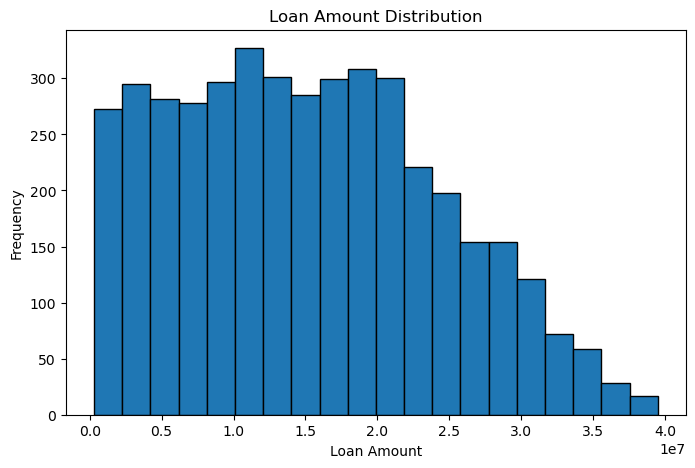

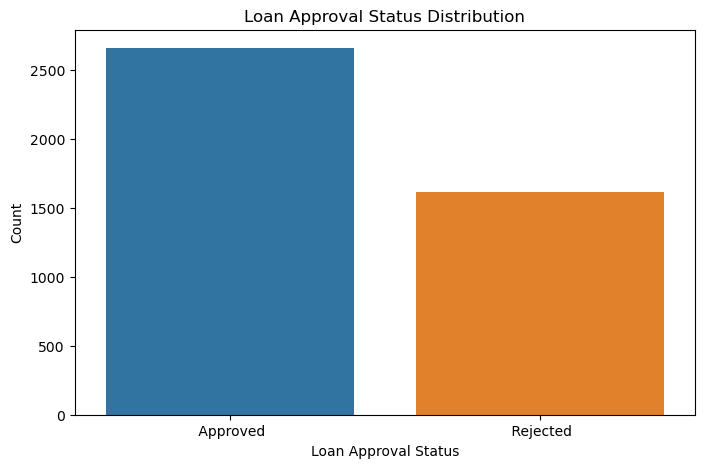

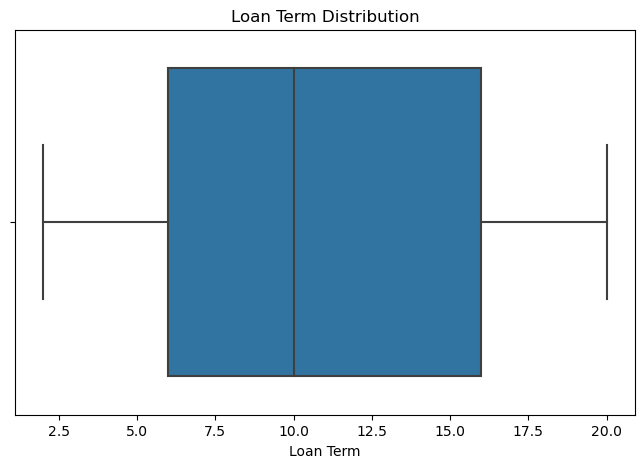

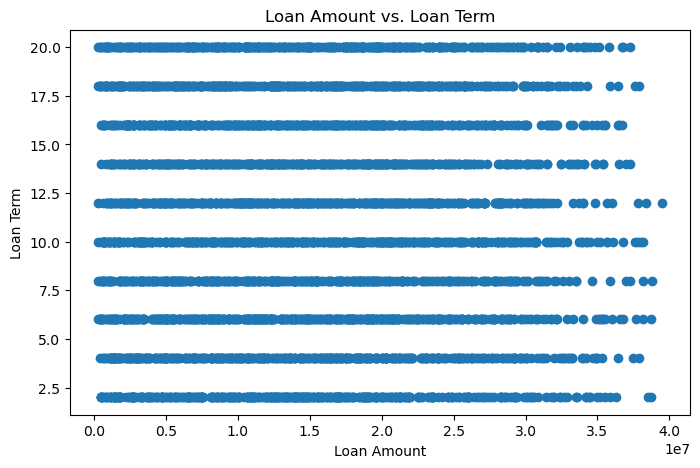

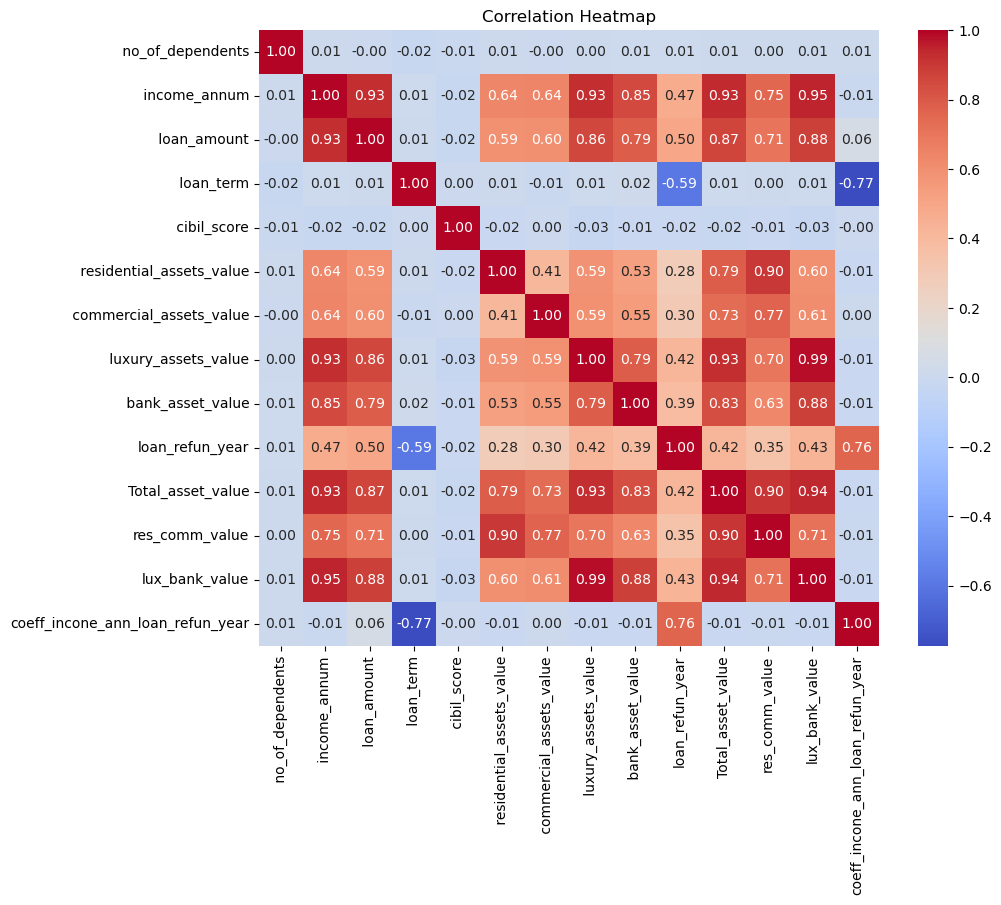

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a DataFrame called 'df'
# Replace 'loan_amount', 'loan_term', and other column names as needed

# Histogram for loan_amount
plt.figure(figsize=(8, 5))
plt.hist(df[' loan_amount'], bins=20, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')
plt.show()

# Bar plot for loan_approval_status (categorical variable)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=' loan_status')
plt.xlabel('Loan Approval Status')
plt.ylabel('Count')
plt.title('Loan Approval Status Distribution')
plt.show()

# Box plot for loan_term
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[' loan_term'])
plt.xlabel('Loan Term')
plt.title('Loan Term Distribution')
plt.show()

# Scatter plot for loan_amount vs. loan_term
plt.figure(figsize=(8, 5))
plt.scatter(df[' loan_amount'], df[' loan_term'])
plt.xlabel('Loan Amount')
plt.ylabel('Loan Term')
plt.title('Loan Amount vs. Loan Term')
plt.show()

# Correlation heatmap for numerical variables
numeric_columns = df.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pair plot for numerical variables
#sns.pairplot(numeric_columns)
#plt.show()


**Features engineering**

In [20]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the ' education' field (note the leading whitespace)

# Clean the column name by stripping leading and trailing whitespaces
df.rename(columns=lambda x: x.strip(), inplace=True)
# Removing whitespaces from the 'education' column
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip()



# Using label encoding
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
# Using label encoding
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})

# Using label encoding
df['loan_status'] = df['loan_status'].map({'Approved': 1, 'Rejected': 0})



In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

numcol = []
for col in df.columns:
    if df[col].dtypes == "int64":
        numcol.append(col)
    
print(numcol)

scaler = MinMaxScaler()
for col in numcol:
    df[[col]] = scaler.fit_transform(df[[col]])
    
df.head()

['no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status', 'Total_asset_value', 'res_comm_value', 'lux_bank_value']


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,loan_refun_year,Total_asset_value,res_comm_value,lux_bank_value,coeff_incone_ann_loan_refun_year
0,0.4,1.0,0.0,0.969072,0.755102,0.555556,1.0,0.085616,0.907216,0.575835,0.544218,1.0,2.491667e+06,0.557032,0.430407,0.568224,25.954861
1,0.0,0.0,1.0,0.402062,0.303571,0.333333,0.0,0.095890,0.113402,0.218509,0.224490,0.0,1.525000e+06,0.183832,0.107066,0.220561,37.195122
2,0.6,1.0,0.0,0.917526,0.750000,1.000000,0.0,0.246575,0.231959,0.848329,0.870748,0.0,1.485000e+06,0.634551,0.250535,0.856075,16.318681
3,0.6,1.0,0.0,0.824742,0.775510,0.333333,0.0,0.626712,0.170103,0.591260,0.537415,0.0,3.837500e+06,0.579181,0.462527,0.577570,46.798780
4,1.0,0.0,1.0,0.989691,0.609694,1.000000,0.0,0.428082,0.422680,0.748072,0.340136,0.0,1.210000e+06,0.604651,0.443255,0.637383,12.346939


**Train test Split**

In [22]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your preprocessed DataFrame containing the selected features and target variable
# Replace 'X' with the DataFrame containing the feature columns and 'y' with the target variable 'loan_status'

# Splitting into features (X) and target variable (y)
X = df.drop('loan_status', axis=1)  # Selecting all columns except 'loan_status' as features
y = df['loan_status']  # Target variable 'loan_status'

# Splitting into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes to verify the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3415, 16)
X_test shape: (854, 16)
y_train shape: (3415,)
y_test shape: (854,)


**Testing different models**

In [23]:
import pandas as pd
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Assuming 'X' is your feature matrix and 'y' is your target variable 'loan_status'

# Define the models you want to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Perform k-fold cross-validation (k=5)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    # Compute cross-validation scores for accuracy and F1 score
    scoring = ['accuracy', 'f1']
    cv_results = cross_validate(model, X, y, cv=k_fold, scoring=scoring)

    avg_accuracy = cv_results['test_accuracy'].mean()
    avg_f1_score = cv_results['test_f1'].mean()

    print(f'{model_name} Cross-Validation Accuracy: {avg_accuracy:.4f}')
    print(f'{model_name} Cross-Validation F1 Score: {avg_f1_score:.4f}')

# Choose the best model based on cross-validation results
best_model_name = max(models, key=lambda x: models[x].fit(X, y).score(X, y))
best_model = models[best_model_name]

# Train the best model on the entire dataset
best_model.fit(X, y)


Logistic Regression Cross-Validation Accuracy: 0.6222
Logistic Regression Cross-Validation F1 Score: 0.7670
Random Forest Cross-Validation Accuracy: 0.9166
Random Forest Cross-Validation F1 Score: 0.9293
Support Vector Machine Cross-Validation Accuracy: 0.6222
Support Vector Machine Cross-Validation F1 Score: 0.7670


RandomForestClassifier()

**graphic representation to see how our model is performing**

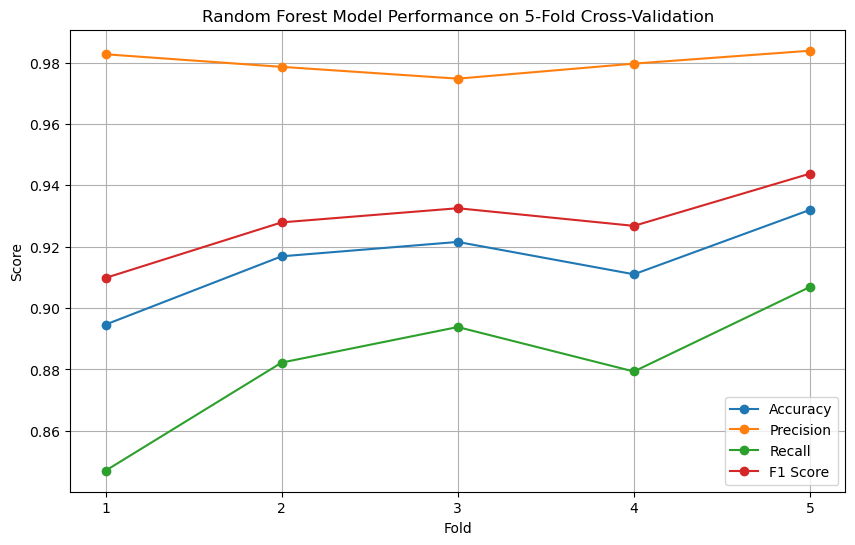

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'X' is your feature matrix and 'y' is your target variable 'loan_status'

# Perform k-fold cross-validation (k=5)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store the metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Loop over each fold and compute the metrics
for fold_idx, (train_idx, test_idx) in enumerate(k_fold.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot the metrics for each fold
plt.figure(figsize=(10, 6))
fold_indices = np.arange(1, k_fold.n_splits + 1)

plt.plot(fold_indices, accuracy_scores, label='Accuracy', marker='o')
plt.plot(fold_indices, precision_scores, label='Precision', marker='o')
plt.plot(fold_indices, recall_scores, label='Recall', marker='o')
plt.plot(fold_indices, f1_scores, label='F1 Score', marker='o')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Random Forest Model Performance on 5-Fold Cross-Validation')
plt.xticks(fold_indices)
plt.legend()
plt.grid()
plt.show()


In [25]:
model = rf_model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy_score(y_test,pred)

0.9296600234466589

**Markdown to just stock this hyperparameters tuning**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'X' is your feature matrix and 'y' is your target variable 'loan_status'

# Perform k-fold cross-validation (k=5)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)


# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the Random Forest model and hyperparameter grid
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=k_fold)

# Loop over each fold and compute the metrics for the tuned model
accuracy_scores_tuned = []
precision_scores_tuned = []
recall_scores_tuned = []
f1_scores_tuned = []

for fold_idx, (train_idx, test_idx) in enumerate(k_fold.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Perform hyperparameter tuning on the training data
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores_tuned.append(accuracy)
    precision_scores_tuned.append(precision)
    recall_scores_tuned.append(recall)
    f1_scores_tuned.append(f1)

# Plot the metrics for the untuned and tuned models
plt.figure(figsize=(12, 8))
fold_indices = np.arange(1, k_fold.n_splits + 1)

plt.plot(fold_indices, accuracy_scores, label='Accuracy (Untuned)', marker='o', linestyle='dashed')
plt.plot(fold_indices, precision_scores, label='Precision (Untuned)', marker='o', linestyle='dashed')
plt.plot(fold_indices, recall_scores, label='Recall (Untuned)', marker='o', linestyle='dashed')
plt.plot(fold_indices, f1_scores, label='F1 Score (Untuned)', marker='o', linestyle='dashed')

plt.plot(fold_indices, accuracy_scores_tuned, label='Accuracy (Tuned)', marker='o')
plt.plot(fold_indices, precision_scores_tuned, label='Precision (Tuned)', marker='o')
plt.plot(fold_indices, recall_scores_tuned, label='Recall (Tuned)', marker='o')
plt.plot(fold_indices, f1_scores_tuned, label='F1 Score (Tuned)', marker='o')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Random Forest Model Performance on 5-Fold Cross-Validation')
plt.xticks(fold_indices)
plt.legend()
plt.grid()
plt.show()


**PRC with 5 K-fold**

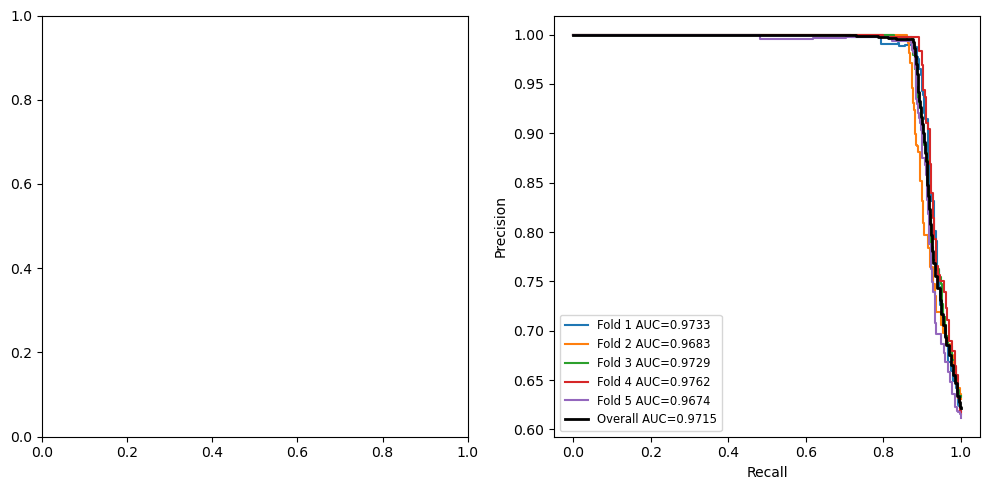

In [26]:
import matplotlib.pyplot as plt
import numpy

from sklearn.metrics import precision_recall_curve, auc



FOLDS = 5

f, axes = plt.subplots(1, 2, figsize=(10, 5))

k_fold = KFold(n_splits=FOLDS, shuffle=True, random_state=12345)
predictor = rf_model

y_real = []
y_proba = []
for i, (train_index, test_index) in enumerate(k_fold.split(X)):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    predictor.fit(Xtrain, ytrain)
    pred_proba = predictor.predict_proba(Xtest)
    precision, recall, _ = precision_recall_curve(ytest, pred_proba[:,1])
    lab = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
    axes[1].step(recall, precision, label=lab)
    y_real.append(ytest)
    y_proba.append(pred_proba[:,1])

y_real = numpy.concatenate(y_real)
y_proba = numpy.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)
lab = 'Overall AUC=%.4f' % (auc(recall, precision))
axes[1].step(recall, precision, label=lab, lw=2, color='black')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc='lower left', fontsize='small')

f.tight_layout()

**Final confusion matrix on test set**

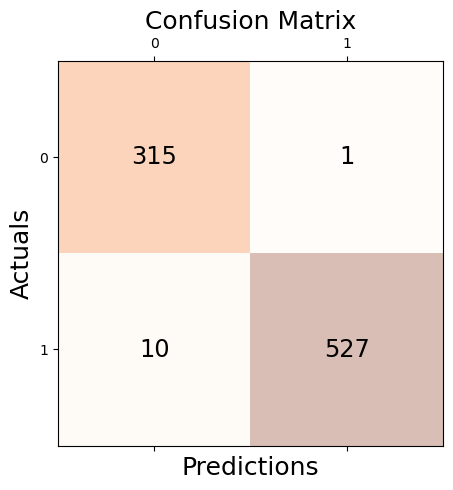

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Calculate the confusion matrix
rf_model_pred = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=rf_model_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Last metrics evaluation on test set to see how well our model is performing**

In [28]:
# Evaluate the model with the custom threshold
accuracy = accuracy_score(y_test, rf_model_pred)
precision = precision_score(y_test, rf_model_pred)
recall = recall_score(y_test, rf_model_pred)
f1 = f1_score(y_test, rf_model_pred)

print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

Accuracy: 0.99, Precision: 1.00, Recall: 0.98, F1-score: 0.99
